<a href="https://colab.research.google.com/github/ViniciusBerti/20241_maua_ecm252_intro_git/blob/main/IMT_ex_avaliativo_graphs_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


In [ ]:
#@markdown Nome completo e RA (*\<nome\>, \<RA\>*)
Aluno = 'Vinícius de Oliveira Berti, 21.01219-9' #@param {type:"string"}






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "https://github.com/Rogerio-mack/IMT_CD_2025/raw/refs/heads/main/data/"


# **Case: Café**

Marcas de café têm na embalagem anotado que o peso líquido é de 1 Kg $\pm$ 0.05 (distribuição normal). Você quer fazer uma rotina para analisar amostras de diferentes fornecedores, rejeitando fornecedores cuja as amostras estão estão abaixo do intervalo de confiança de 95% do peso, embora aceite pesos acima. Para facilitar o uso da rotina pelo time comercial você faz uma rotina que exibe o resultado sobre as amostras como a seguir.

Dicas (opcionais):
1. Você vai empregar as funções `norm.pdf()` e `norm.ppf()`
2. Para o sobreado abaixo da curva empregue `ax.fill_between()`
3. Assinatura sugerida da função: `def analisa_amostra(df, mu, sigma, ax)`





In [2]:
df1 = pd.read_csv(path + 'amostra_cafe_1.csv')
display(df1.head())
df2 = pd.read_csv(path + 'amostra_cafe_2.csv')
display(df2.head())
df3 = pd.read_csv(path + 'amostra_cafe_3.csv')
display(df3.head())

,peso_cafe
0,1.006539
1,0.922261
2,0.883683
3,0.979279
4,1.007257


,peso_cafe
0,1.002032
1,0.941586
2,0.991946
3,1.001016
4,1.058258


,peso_cafe
0,0.964969
1,0.920406
2,0.984333
3,1.056115
4,0.918081


In [3]:
from scipy.stats import norm

def analisa_amostra(df, mu, sigma, ax):
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    y = norm.pdf(x, mu, sigma)
    ax.plot(x, y, color='tab:blue', lw=1.5)

    alpha = 0.05
    inf = norm.ppf(alpha/2, mu, sigma)
    sup = norm.ppf(1 - alpha/2, mu, sigma)

    ax.fill_between(x, 0, y, where=(x >= inf) & (x <= sup),
                    color='tab:green', alpha=0.2)

    y_inf = norm.pdf(inf, mu, sigma)
    y_sup = norm.pdf(sup, mu, sigma)
    ax.vlines(inf, 0, y_inf, color='darkred', lw=2, label='inf')
    ax.vlines(sup, 0, y_sup, color='green',   lw=2, label='sup')

    ax.set_title('Análise da Amostra', fontsize=16,
                 fontweight='bold', color='navy')
    ax.set_xlabel('Peso Esperado (Distribuição Normal)')
    ax.set_ylabel('Densidade de Probabilidade')
    ax.legend(loc='upper right')

    ax.text(mu, norm.pdf(mu, mu, sigma)*0.6,
            '95%', ha='center', va='center',
            fontsize=18, fontweight='bold', color='navy')

    pct_below = (df['peso_cafe'] < inf).mean() * 100
    pct_above = 100 - pct_below

    if pct_below > (alpha/2) * 100:
        txt = f'Fornecedor Rejeitado\nEncontrados {pct_below:.2f}% abaixo do peso'
        cor, arrow_cor = 'darkred', 'darkred'
    else:
        txt = f'Fornecedor Aceito\nEncontrados {pct_above:.2f}% acima do peso mínimo'
        cor, arrow_cor = 'green', 'green'

    ax.annotate(
        txt,
        xy=(inf, norm.pdf(inf, mu, sigma)*0.5),
        xytext=(inf + 0.05, norm.pdf(mu, mu, sigma)*0.35),
        arrowprops=dict(arrowstyle='->', color=arrow_cor, lw=1.5),
        color=cor, fontsize=9
    )

    ax.set_xlim(mu - 4*sigma, mu + 4*sigma)
    ax.set_ylim(0, max(y)*1.1)

np.random.seed(42)

amostra_max = pd.DataFrame({
    'peso_cafe': np.random.normal(loc=1, scale=0.05, size=1000)
})

amostra_min = pd.DataFrame({
    'peso_cafe': np.random.normal(loc=0.95, scale=0.05, size=1000)
})

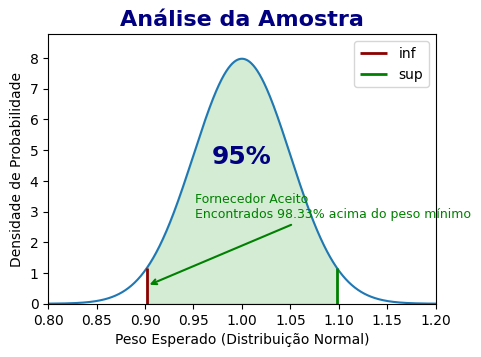

In [84]:
fig, ax = plt.subplots(1,1,figsize=(5, 3.5))

mu = 1
sigma = 0.05

analisa_amostra(df3, mu, sigma, ax)
plt.show()

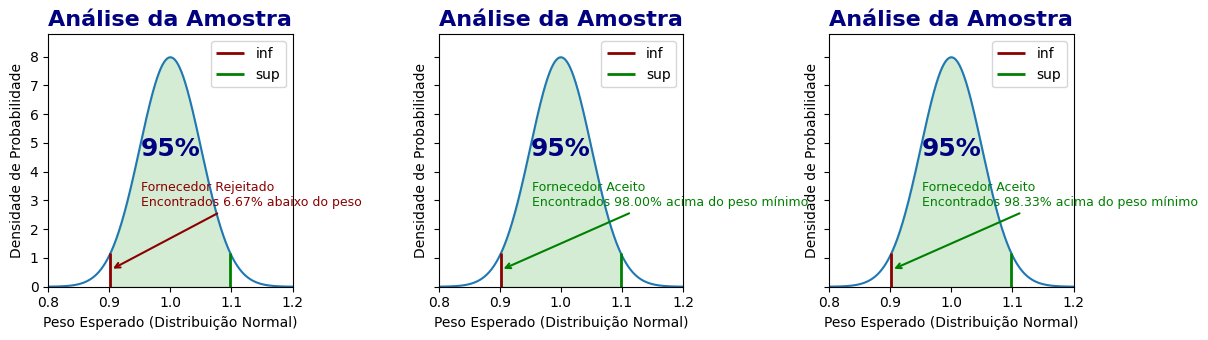

In [5]:
fig, ax = plt.subplots(1,3,figsize=(12, 3.5),sharey=True)

mu = 1
sigma = 0.05

for i, df in zip(range(3),[df1, df2, df3]):
  analisa_amostra(df, mu, sigma, ax[i])

plt.tight_layout()
plt.show()

A rotina ainda deve funcionar para outras embalagens de café, como sacas de 60Kg, pacotes de 10 e 5Kg etc. que apresentam peso médio e desvio padrão diferente. Abaixo, a análise de sacas de 60Kg $\pm$ 0.1.

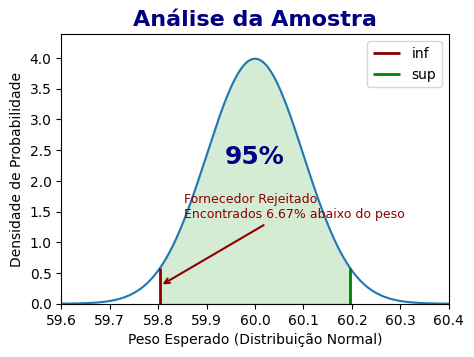

In [6]:
df_saca = pd.read_csv(path + 'amostra_cafe_extra.csv')

fig, ax = plt.subplots(1,1,figsize=(5, 3.5))

mu = 60
sigma = 0.1

analisa_amostra(df_saca, mu, sigma, ax)
plt.show()

# **CASE: Beer Production**

Você quer fazer analise dos estados produtores de cerveja com produção acima da média dos estados (produção de todos os anos). Para facilitar o uso da rotina pelo time de gestão de produção dos estados você faz uma rotina que exibe o resultados como a seguir, permitindo destacar um dos estados.

Dicas (opcionais):

1. Empregue e altere a rotina `add_value_labels` para adicionar valores às barras
2. Acesse as propriedade `ax.get_xticklabels()[...].set_color('darkred')` e     `ax.patches[...].set_facecolor()` para setar os destaques.

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/beer_states.csv')
df.head()

,state,year,barrels,type
0,AK,2008,2067.69,On Premises
1,AK,2009,2263.65,On Premises
2,AK,2010,1929.15,On Premises
3,AK,2011,2251.02,On Premises
4,AK,2012,2312.43,On Premises


In [8]:
def add_value_labels(ax, spacing=5, fmt="{:.1f}"):
    """Adiciona os valores em cima das barras de um gráfico Seaborn."""
    for bar in ax.patches:
        y_value = bar.get_height()
        x_value = bar.get_x() + bar.get_width() / 2

        label = fmt.format(y_value)

        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, spacing),
            textcoords="offset points",
            ha='center',
            va='bottom'
        )

In [9]:
def analisa_producao(df, estado_destaque, ax):
    df2 = df[df.state.str.lower() != 'total'].copy()
    df2['barrels_k'] = df2['barrels'] / 1000.0

    medias = df2.groupby('state')['barrels_k'].mean()
    limiar = medias.mean()
    estados = medias.sort_values(ascending=False).head(10).index
    estados = medias[estados].sort_values(ascending=False).index

    sns.barplot(
        data=df2[df2.state.isin(estados)],
        x='state', y='barrels_k',
        order=estados,
        color='steelblue',
        errorbar=('ci', 95),
        capsize=0.2,
        err_kws={'color': 'black'},
        ax=ax
    )

    patches = ax.patches
    if estado_destaque in list(estados):
        i = list(estados).index(estado_destaque)
        patches[i].set_facecolor('indianred')
        ax.get_xticklabels()[i].set_color('darkred')

    ano_ini, ano_fim = df2.year.min(), df2.year.max()
    ax.set_title(
        f"Milhares de Barris Produzidos – {ano_ini} a {ano_fim}\n"
        "(Estados com produção acima da média)",
        fontsize=16, fontweight="bold", color="navy"
    )
    ax.set_xlabel("Estado", fontsize=12, color="navy")
    ax.set_ylabel("Barris (K)", fontsize=12, color="navy")
    ax.tick_params(axis="x", colors="navy")
    ax.tick_params(axis="y", colors="navy")
    ax.yaxis.grid(True, linestyle="--", alpha=0.5)
    ax.set_axisbelow(True)
    ax.set_ylim(bottom=0)

    add_value_labels(ax, fmt="{:.0f}K", spacing=5)

    plt.tight_layout()

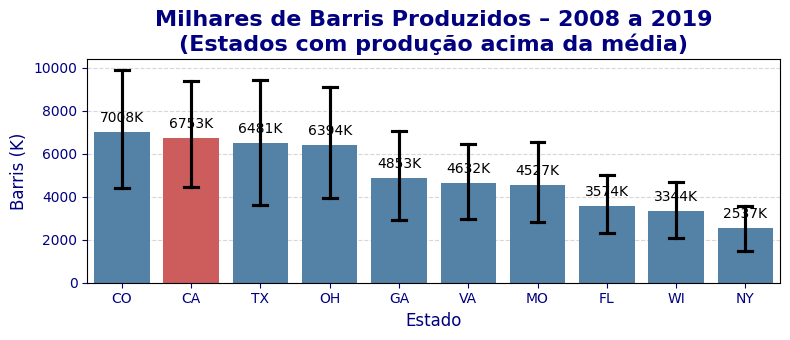

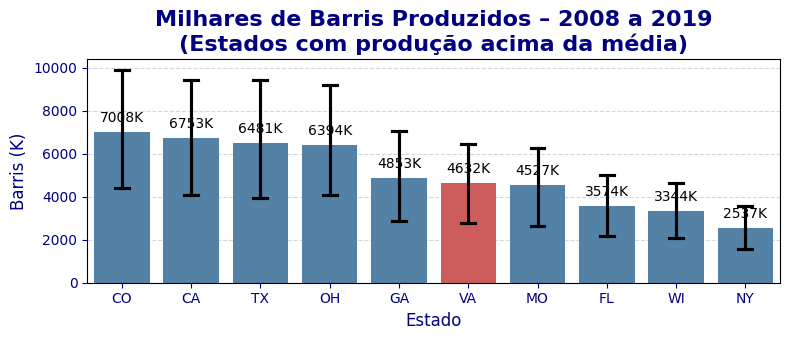

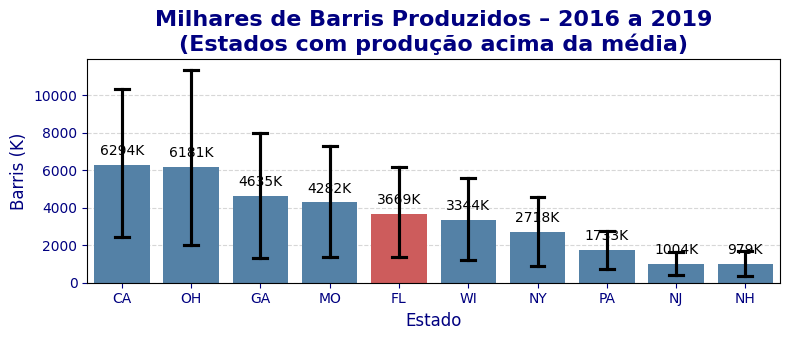

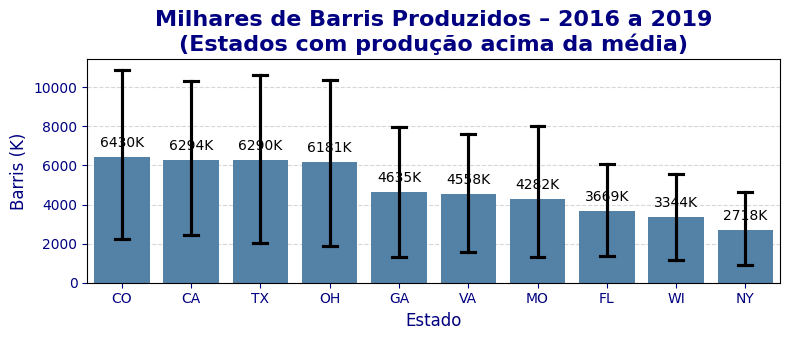

In [10]:
fig, ax = plt.subplots(figsize=(8,3.5))
analisa_producao(df, 'CA', ax)
plt.show()

fig, ax = plt.subplots(figsize=(8,3.5))
analisa_producao(df, 'VA', ax)
plt.show()

fig, ax = plt.subplots(figsize=(8,3.5))
analisa_producao(df[ (df.year > 2015) & (~df.state.isin(['VA','CO','TX'])) ], 'FL', ax)
plt.show()

fig, ax = plt.subplots(figsize=(8,3.5))
analisa_producao(df[ df.year > 2015 ], 'XX', ax)
plt.show()